<a href="https://colab.research.google.com/github/vicotrbb/machine_learning/blob/master/linear_regression/learning_roadmap/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSAO POLINOMIAL

A regressao polinomial e um modelo de regressao linear, utilizada principalmente quando modelos de regressao linear normais nao sao a melhor escolha para os dados que estao sendo trabalhados, como por exemplo para descrever relacionamentos curvilineos entre os dados.

### Regressao curvilinea
Devemos lembrar primeiramente, que podemos aproximar qualquer funcao utilizando um polinomio. A regressao polinomial basicamente cria novas variaveis utilizando as antigas para criar polinomios a serem usados no modelo. A aplicacao do modelo de regressao linear nao muda, apesar das novas variaveis a serem introduzidas.

E.g: Elevar as variaveis em polinomios quadrados

### Tipos de modelo e formulas
O modelo de regressao polinomial, pode ser quadratico por exemplo, significando que elevaremos nossas variaveis ao quadrado e segue a seguinte funcao:

* $\hat{y} = b_{0} + b_{1}x_{1} + b_{2}(x_1)^{2}$

Uma regressao polinomial cubica seria representada pela seguinte equacao:

* $\hat{y} = b_{0} + b_{1}x_{1} + b_{2}(x_1)^{2} + b_{3}(x_1)^{3}$

Ao adicionar polinomios de maiores ordens a equacao criamos modelos de regressoes polinomiais de maior ordem

* $\hat{y} = b_{0} + b_{1}x_{1} + b_{2}(x_1)^{2} + b_{3}(x_1)^{3} + ... + b_{n}(x_1)^{n}$


### Calculando variaveis polinomiais de terceira ordem

Para isto, utilizamos as funcoes do numpy, o codigo a seguir serve para modelos de regressao linear simples.

Segue codigo exemplo:

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)

print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


### Regressao Linear polinomial multipla

Da forma que foi apresentada antes, e possivel criar apenas modelos simples, para criamos modelos multiplos, utilizamos o sklearn.

Um polinimio multiplo segue a seguinte equacao:

* $\hat{y} = b0 + b1X_1 + b2X_2 + b3X_1X_2 + b4(X_1)^{2} + b5(X_2)^{2} + ...$

Segue codigo:


In [128]:
z = [[1,2], [2, 1]]
pr = PolynomialFeatures(degree=2)
z = pr.fit_transform(z)

z

array([[1., 1., 2., 1., 2., 4.],
       [1., 2., 1., 4., 2., 1.]])

## Como escolher a melhor ordem polinomial para o modelo
### Underfitting & Overfitting

Quando formos selecionar qual a ordem correta para nosso modelo, precisamos ter alguns cuidados. 

Caso a ordem acabe por ser baixa demais, nosso modelo nao ira se encaixar muito bem para nossos dados, ficando com uma taxa de erro muito alta.

 O mesmo acontece caso a ordem seja muito alta, ocasionando no modelo nao representar corretamente os dados.

Perceba no exemplo abaixo, que ao manipular a variavel degree(representando a ordem polinomial) a linha que representa a regressao polinomial começa a ficar distorcida, caso a ordem seja muito baixa, verá que a linha nao acompanha da melhor forma a distribuicao dos dados e caso seja muito alta, sera fortemente distorcida, principalmente ao final. Contudo, com a ordem correta, vemos que o modelo acompanha corretamente os dados.




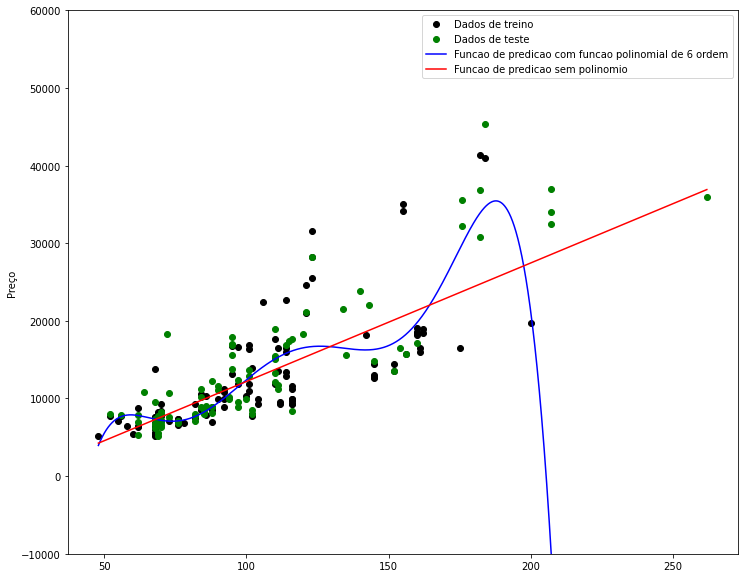

In [151]:
Y = df['price']
X = df.drop('price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=0)

degree = 6

def plot(x_train, x_test, y_train, y_test, dgre):
  width = 12
  height = 10
  plt.figure(figsize=(width, height))

  xmax = max([x_train.values.max(), x_test.values.max()])
  xmin = min([x_train.values.min(), x_test.values.min()])
  x = np.arange(xmin, xmax, 0.1)

  lr = LinearRegression()
  pr = PolynomialFeatures(degree=dgre)
  x_train_pr = pr.fit_transform(x_train.values.reshape(-1, 1))
  lr.fit(x_train_pr, y_train)

  plt.plot(x_train, y_train, 'ro', color='black', label='Dados de treino')
  plt.plot(x_test, y_test, 'go', color='green', label='Dados de teste')
  plt.plot(x, lr.predict(pr.fit_transform(x.reshape(-1, 1))), c='b',
           label=f'Funcao de predicao com funcao polinomial de {dgre} ordem')
  lr.fit(x_train.values.reshape(-1, 1), y_train)
  plt.plot(x, lr.predict(x.reshape(-1, 1)), c='r',
           label='Funcao de predicao sem polinomio')
  plt.ylim([-10000, 60000])
  plt.ylabel('Preço')
  plt.legend()
  plt.show()

plot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, degree)

### Seleção de Modelo

Como é de grande importancia que possamos selecionar a melhor ordem para nossa regressao polinomial e não é o ideal fazermos esse trabalho com força bruta, utilizamos medidas de perfomance para avaliar nossos modelos automaticamente, estas medidas são o R2_score e o MSE.

Podemos criar uma funcao para encontrarmos a melhor ordem, onde identificaremos que a melhor ordem seria a 3, por possuir o maior indice de acerto de acordo com o R2 Score.

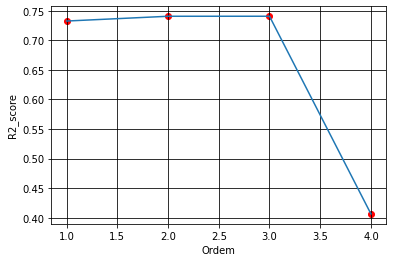

In [149]:
order_score = []
order = np.arange(1, 5)
lr = LinearRegression()

for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  lr.fit(x_train_pr, y_train)
  order_score.append(lr.score(x_test_pr, y_test))

plt.plot(order, order_score)
plt.scatter(order, order_score, c='red')
plt.xlabel('Ordem')
plt.ylabel('R2_score')
plt.grid(color='black', linestyle='-')
plt.show()
  